In [1]:
from SingleAgent import SingleRLAgent
from MultiAgentEnvironment import MultiAgentEnvironment
import matplotlib.pyplot as plt
from RLTrainer import demonstrate_model
from DQN_Agent_Single import DQN_Agent_Single
from DQN_Agent_Double import DQN_Agent_Double
import pytorch_utils as ptu
from QNets import N_Concat_CNNs
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, update_display
import ipywidgets as widgets
import imageio
import time
import random
import numpy as np
from collections import namedtuple 
from collections import deque
import pickle
import torch
#!pip3 install pickle5
import pickle5 as pickle
import seaborn as sb
import os
from pathlib import Path
import math

Device set to : cpu


/home/silvester/anaconda3/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 6050). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [146]:
??np.corrcoef

In [149]:
vec1 = [1.]*10
vec2 = [2.]*10
vec2[1] = 1

vec1 = 2*np.array(vec1)-1  #2*x-1 (binary to bipolar)
vec2 = 2*np.array(vec2)-1
vec3 = np.stack([vec1, vec2])
vec3 = np.array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]
 ,[-1., -1., -1., -1., 1., -1., 1., -1., -1., 1.]])
print(vec3)
#corry = np.corrcoef(vec3)[0, 1]
corry = np.cov(vec3)[0, 1]
print(corry)

[[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1.  1. -1.  1. -1. -1.  1.]]
0.0


In [98]:
#numpy.random.choice(numpy.arange(1, 7), p=[0.1, 0.05, 0.05, 0.2, 0.4, 0.2])
max_objects = 8
dominant_prob = 0.3
probs = [(1-dominant_prob)/(max_objects) if i<max_objects else dominant_prob for i in range(max_objects+1)]
print(probs)
print(sum(probs))

[0.0875, 0.0875, 0.0875, 0.0875, 0.0875, 0.0875, 0.0875, 0.0875, 0.3]
1.0


In [96]:
np.arange(0, max_objects+1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [97]:
for i in range(20):
    n_objects = np.random.choice(np.arange(0, max_objects+1), p=probs)
    print(n_objects)

8
8
8
8
6
7
8
8
2
8
8
8
8
8
8
2
8
5
0
8


In [2]:
data_dir = '/home/silvester/programming/rl-single-agent-numbers/counting-agents/src/../data/'

In [2]:
data_dir = '/home/silvester/programming/rl-single-agent-numbers/remote/counting-agents/src/../data/'

In [7]:
exp_type_list = ['static_3', 'temporal_3', 'temporal_abacus_1D_2', 'temporal_abacus_2D_2']
nice_exp_type_dict = {'static_3': 'Static', 
                      'temporal_3': 'Temporal', 
                      'temporal_abacus_1D_2': 'Temporal+1D-constraints', 
                      'temporal_abacus_2D_2': 'Temporal+2D-constraints'}
exp_type_dir_list = [data_dir + exp_type for exp_type in exp_type_list]

In [8]:
# Count how many full runs there have been for each setup
full_count_for_each_setup = {exp_type: 0 for exp_type in exp_type_list}

for exp_type in exp_type_list:
    exp_type_dir = data_dir + exp_type
    exp_dir_list = os.listdir(exp_type_dir)
    for exp_dir in exp_dir_list:
        master_episodes_file_dir = exp_type_dir + '/' + exp_dir + '/master_episodes.pkl'
        #print(master_episodes_file_dir)
        if(os.path.exists(master_episodes_file_dir)):
            with open(master_episodes_file_dir, 'rb') as f:
                master_episodes = pickle.load(f)
                #print(master_episodes)
            if(max(master_episodes.keys()) == 9):
                full_count_for_each_setup[exp_type] += 1
            
print(full_count_for_each_setup)

{'static_3': 4, 'temporal_3': 0, 'temporal_abacus_1D_2': 10, 'temporal_abacus_2D_2': 6}


In [ ]:
ext_img_shape = (img_height * agenty.ext_shape[1], img_height * agenty.ext_shape[0])
ext_repr_img = Image.fromarray(agenty.ext_repr.externalrepresentation * 255).resize(ext_img_shape, resample=0)
ext_repr_img = utils.add_grid_lines(ext_repr_img, agenty.ext_repr.externalrepresentation)
ext_repr_img = ext_repr_img.transpose(Image.TRANSPOSE)
annotaty = str(agenty.n_objects)
ext_repr_img = utils.annotate_below(ext_repr_img, annotaty).convert('RGB')
dimmy = 1 if agenty.ext_shape[1] == 1 else 2
if (dimmy==1):
    space_img = Image.fromarray(np.ones(agenty.ext_shape[1], dtype=np.uint8)*255).resize((img_height, img_height//4), resample=0)
    ext_repr_img = utils.concat_imgs_h([ext_repr_img, space_img], dist=0)
else:
    space_img = Image.fromarray(np.ones(agenty.ext_shape[1], dtype=np.uint8)*255).resize((img_height//4, img_height), resample=0)
    ext_repr_img = utils.concat_imgs_h([ext_repr_img, space_img], dist=0)

#ext_repr_img = np.asarray( ext_repr_img ).astype(np.uint8).transpose([2,0,1])
ext_repr_imgs[agenty.n_objects].append(ext_repr_img)



total_imgs_tensor = [np.expand_dims(np.asarray(ext_repr_imgs[i][0]).astype(np.uint8).transpose([2, 0, 1]), axis=0) for i in range(0, env.max_objects + 1)]
total_imgs = [ext_repr_imgs[i][0] for i in range(0, env.max_objects + 1)]

min_examples = 10000
for i in range(0, env.max_objects + 1):
    if(len(ext_repr_imgs[i]) < min_examples):
        min_examples = len(ext_repr_imgs[i])
example_repr_for_all_numbers_list = []
show_n_examples = min(min_examples, 10)
for j in range(show_n_examples):
    j_example_repr_for_all_numbers = [ext_repr_imgs[i][j] for i in range(0, env.max_objects + 1)]
    j_example_repr_for_all_numbers = utils.concat_imgs_h(j_example_repr_for_all_numbers, dist=50)
    example_repr_for_all_numbers_list.append(j_example_repr_for_all_numbers)

all_example_repr = utils.concat_imgs_v(example_repr_for_all_numbers_list, dist=50) #.resize(env.max_objects*100,show_n_examples*100*10)

if(env.dimmy==1):
    total_imgs_tensor = np.concatenate(total_imgs_tensor, axis=2)
    total_imgs = utils.concat_imgs_v(total_imgs, dist=10)

exp_type /home/silvester/programming/rl-single-agent-numbers/remote/counting-agents/src/../data/temporal_abacus_1D_2
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 9, 8, 7, 6, 5, 4, 3, 2, 1]
[0, 9, 8, 7, 6, 5, 4, 3, 2, 1]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 9, 8, 7, 6, 5, 4, 3, 2, 1]
{0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 1: [1, 9, 9, 1, 1, 1, 1, 1, 1, 9], 2: [2, 8, 8, 2, 2, 2, 2, 2, 2, 8], 3: [3, 7, 7, 3, 3, 3, 3, 3, 3, 7], 4: [4, 6, 6, 4, 4, 4, 4, 4, 4, 6], 5: [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], 6: [6, 4, 4, 6, 6, 6, 6, 6, 6, 4], 7: [7, 3, 3, 7, 7, 7, 7, 7, 7, 3], 8: [8, 2, 2, 8, 8, 8, 8, 8, 8, 2], 9: [9, 1, 1, 9, 9, 9, 9, 9, 9, 1]}


/home/silvester/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator


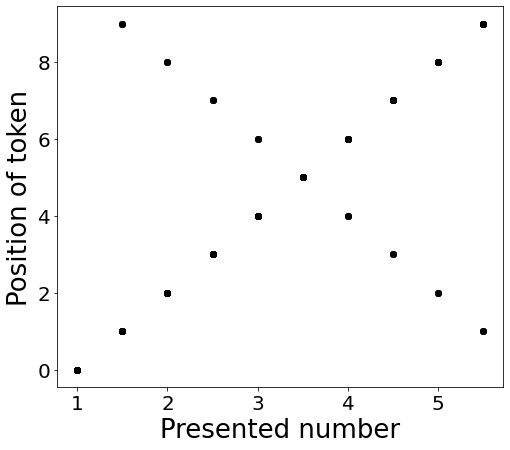

In [222]:
# Plot token-positions for multiple runs and setup: abacus-1D
exp_type = data_dir + 'temporal_abacus_1D_2'
print('exp_type', exp_type)

fig, ax = plt.subplots(figsize=(8,7))
max_episode = 0
all_token_positions = {i: [] for i in range(0,10)}

token_positions_mean = {}
token_positions_std = {}


exp_dir_list = os.listdir(exp_type)


for exp_dir in exp_dir_list:
    master_episodes_file_dir = exp_type + '/' + exp_dir + '/ext_representations/external_representations.pkl'
    with open(master_episodes_file_dir, 'rb') as f:
        ext_repr = pickle.load(f)
        token_positions = get_token_positions_of_reprs(ext_repr)
    print(token_positions)
    for i in range(len(token_positions)):
        all_token_positions[i].append(token_positions[i]-token_positions[0])

for i in all_token_positions.keys():
    token_positions_mean[i] = np.mean(all_token_positions[i])#
    token_positions_std[i] = np.std(all_token_positions[i])

max_numbers = [k for k in all_token_positions.keys()]
#episodes = [v for v in all_master_episodes_dict.values()]


#master_episodes_mean = {i: master_episodes[i] for i in master_episodes_dict.keys()}
print(all_token_positions)
#for i in all_token_positions.keys():
# ax.boxplot(all_token_positions.values(), showmeans=True, 
#                       meanprops={"marker":"o",
#                        "markerfacecolor":"black", 
#                        "markeredgecolor":"black",
#                       "markersize":"10"})

for i in range(len(all_token_positions.keys())):
    ax.scatter(len(all_token_positions[i])*[i], all_token_positions[i], color='black')

#ax.boxplot(master_episodes_mean_dict)
ax.set_xticklabels(all_token_positions.keys())
#current_max = master_episodes_mean_dict[-1]
#if(current_max>max_episode):
#    max_episode = current_max
#    ax.set_ylim(0, master_episodes_mean_dict[-1]+master_episodes_mean_dict[-1]//2)
ax.set_xlabel('Presented number', fontsize=26)
ax.set_ylabel('Position of token', fontsize=26)
ax.tick_params(labelsize=20)
file_path = exp_type + '/token_positions.png'
fig.savefig(file_path)

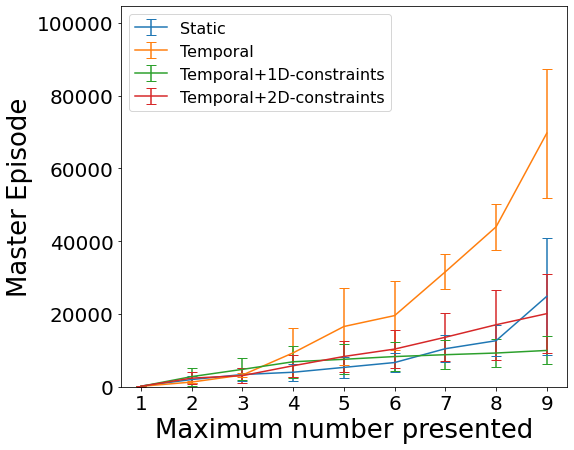

In [217]:
### Plot Master-episodes for all setups and runs

fig, ax = plt.subplots(figsize=(8,7))

max_episode = 0

for exp_type in exp_type_list:
    exp_type_dir = data_dir + exp_type
    exp_dir_list = os.listdir(exp_type_dir)
    all_master_episodes_dict = {i: [] for i in range(1,10)}
    master_episodes_mean_std = {i: [] for i in range(1,10)}

    for exp_dir in exp_dir_list:
        master_episodes_file_dir = exp_type_dir + '/' + exp_dir + '/master_episodes.pkl'
        #print(master_episodes_file_dir)
        if(os.path.exists(master_episodes_file_dir)):
            with open(master_episodes_file_dir, 'rb') as f:
                master_episodes = pickle.load(f)
            for i in master_episodes.keys():
                all_master_episodes_dict[i].append(master_episodes[i])
            
    
    master_episodes_mean_dict = [np.mean(all_master_episodes_dict[i]) for i in all_master_episodes_dict.keys()]
    master_episodes_mean_std = [np.std(all_master_episodes_dict[i]) for i in all_master_episodes_dict.keys()]

    max_numbers = [k for k in all_master_episodes_dict.keys()]
    #episodes = [v for v in all_master_episodes_dict.values()]
    
    
    #master_episodes_mean = {i: master_episodes[i] for i in master_episodes_dict.keys()}
    
    ax.errorbar(range(1,10), 
                master_episodes_mean_dict, 
                yerr=master_episodes_mean_std, 
                solid_capstyle='projecting', 
                capsize=5,
                label=nice_exp_type_dict[exp_type])
    ax.legend(fontsize=16)
    #ax.boxplot(master_episodes_mean_dict)
    ax.set_xticks(max_numbers)
    current_max = master_episodes_mean_dict[-1]
    if(current_max>max_episode):
        max_episode = current_max
        ax.set_ylim(0, master_episodes_mean_dict[-1]+master_episodes_mean_dict[-1]//2)
    ax.set_xlabel('Maximum number presented', fontsize=26)
    ax.set_ylabel('Master Episode', fontsize=26)
    ax.tick_params(labelsize=20)
    file_path = data_dir + '/all_master_episodes.png'
    fig.savefig(file_path)

In [18]:
a = np.array([1, 0, 0, 1])
2*a-1

array([ 1, -1, -1,  1])

/home/silvester/programming/rl-single-agent-numbers/remote/counting-agents/src/../data/temporal_2/temporal_2_external_repr_correlation


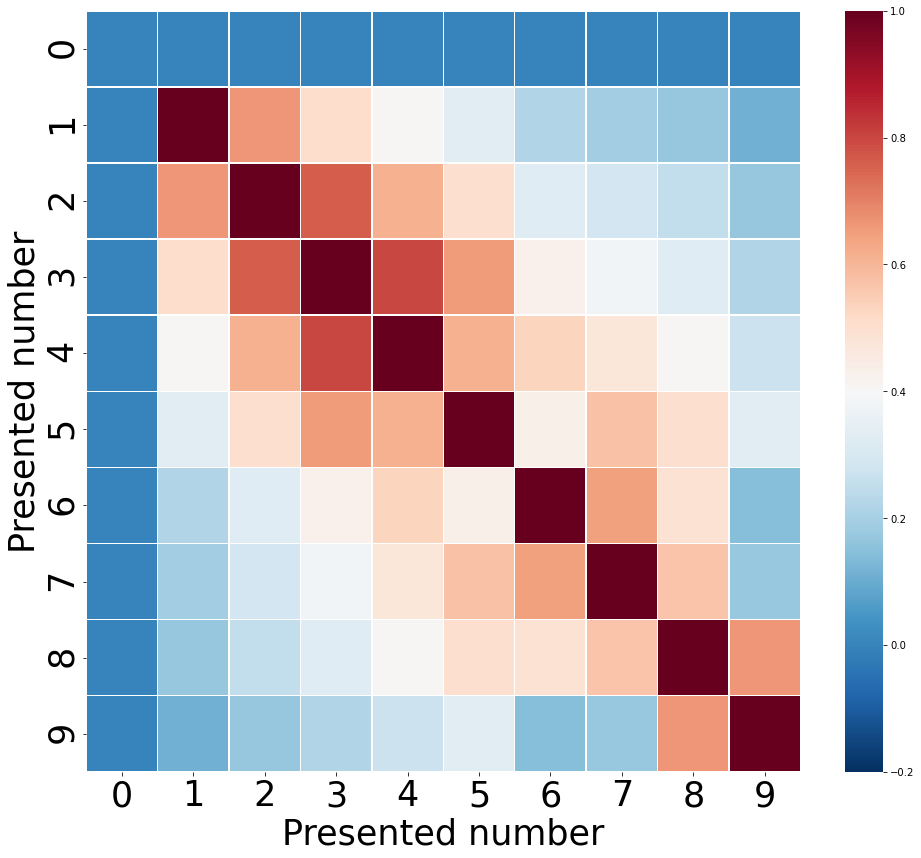

In [230]:
# collect all master-episodes and correlation matrices from each folder
#for exp_type in exp_type_list:

#exp_type = 'static_2'
exp_type = 'temporal_2'
#exp_type = 'temporal_abacus_1D_2'
#exp_type = 'temporal_abacus_2D_2'

exp_type_dir = data_dir + exp_type


def get_avg_corr_matrix(exp_type):
    corr_matrix_list = []
    master_episodes_list = []

    exp_dir_list = os.listdir(exp_type)

    for exp_dir in exp_dir_list:
        master_episodes_file_dir = exp_type + '/' + exp_dir + '/master_episodes.pkl'
        if(os.path.exists(master_episodes_file_dir)):
            with open(master_episodes_file_dir, 'rb') as f:
                master_episodes = pickle.load(f)
            if(max(master_episodes.keys()) == 9):
                ext_repr_file_dir = exp_type + '/' + exp_dir + '/ext_representations/external_representations.pkl'
                with open(ext_repr_file_dir, 'rb') as f:
                    ext_repr = pickle.load(f)
                corr_matrix = create_external_repr_correlation_matrix(ext_repr)
                
                corr_matrix_list.append(corr_matrix)
                #print(corr_matrix)
    
    corr_matrix = np.mean(corr_matrix_list, axis=0)
    
    
    return corr_matrix

corr_matrix = get_avg_corr_matrix(exp_type_dir)
file_path = exp_type_dir + '/' + exp_type + '_external_repr_correlation'
plot_external_repr_correlation(corr_matrix, task_description='', file_path=file_path)
    

In [228]:

def plot_and_save_master_episodes(master_episodes, file_path):
    max_numbers = [k for k in master_episodes]
    episodes = [v for v in master_episodes.values()]
    fig, ax = plt.subplots(figsize=(8,7))
    ax.scatter(max_numbers, episodes, s=100, color='black')
    ax.set_xticks(max_numbers)
    ax.set_ylim(0, episodes[-1]+episodes[-1]//10)
    ax.set_xlabel('Maximum number presented', fontsize=26)
    ax.set_ylabel('Master Episode', fontsize=26)
    ax.tick_params(labelsize=20)
    fig.savefig(file_path)

# If ext_tool==Abacus: calculate spatial structure:
# position of token correlate with the presented number
def get_token_positions_of_reprs(ext_repr):
    one_repr_for_each_number = [repr[0] for repr in ext_repr.values()]
    numbers = [k for k,v in ext_repr.items()]
    repr_size = ext_repr[0][0].size
    pos_of_token_for_each_number = [np.where(repry == 1)[0][0] for repry in one_repr_for_each_number]
    
    return pos_of_token_for_each_number

def plot_token_position_of_reprs(numbrs, pos_of_token_for_each_number, yerr=None,file_path=None):
    fig, ax = plt.subplots(figsize=(8,7))
    ax.errorbar(numbers, pos_of_token_for_each_number, yerr=yerr, s=100, color='black')
    ax.set_xticks(numbers)
    ax.set_yticks(range(repr_size))
    #ax.set_ylim(0, episodes[-1]+episodes[-1]//10)
    ax.set_xlabel('Presented number', fontsize=26)
    ax.set_ylabel('Position of token', fontsize=26)
    ax.tick_params(labelsize=20)
    fig.savefig(file_path)
    
def create_external_repr_correlation_matrix(ext_repr):

    numbers = list(ext_repr.keys())
    max_objects = numbers[-1]
    first,second = max_objects, max_objects
    var_len = first
    range_var_len = range(var_len)
    combined = [(f,s) for f in numbers for s in numbers]

    corr_matrix = np.empty([var_len+1,var_len+1])
    for (i,j) in combined: 
        vec1 = 2*np.array(ext_repr[i][0] )-1  #2*x-1 (binary to bipolar)
        vec2 = 2*np.array(ext_repr[j][0] )-1
        vec3 = np.stack([vec1, vec2])[:, :, 0]
        corry = np.corrcoef(vec3)[0, 1]
        #corry = np.cov(vec3)[0, 1]
        if(math.isnan(corry)):
            #print('vec1: ', vec1)
            #print('vec2: ', vec2)
            corry=0
        corr_matrix[i,j] = corry

    return corr_matrix
        
def plot_external_repr_correlation(corr_matrix, task_description, file_path=None):
    fig, ax = plt.subplots(figsize=(16,14))
    title=task_description 
    max_objects = corr_matrix[0].size-1
    tick_labels = [str(i) for i in range(0,max_objects+1)] #later all keys in DICT of ext_representation
    if(ax is None):
        ax = plt.axes()
    sb.heatmap(corr_matrix, 
                xticklabels=tick_labels,
                yticklabels=tick_labels,
                cmap='RdBu_r',
                linewidth=0.5,
                  ax=ax,
              vmin=-0.2,
              vmax=1.0,
              annot=False)

    ax.set_title(title, fontsize=40)
    ax.set_xlabel('Presented number', fontsize=35)
    ax.set_ylabel('Presented number', fontsize=35)
    ax.tick_params(labelsize=35)
    #file_path = exp_dir + '/ext_repr_correlation.svg'
    
    if(file_path is not None):
        print(file_path)
        fig.savefig(file_path)


In [53]:
vec1 = np.array(ext_repr[2][0] )
vec2 = np.array(ext_repr[2][0] )
vec3 = np.stack([vec1, vec2])[:, :, 0]
print(vec3.shape)
corry = np.corrcoef(vec3)[0, 1]

#print(vec1)
#print(vec2)
print(corry)

(2, 9)
1.0


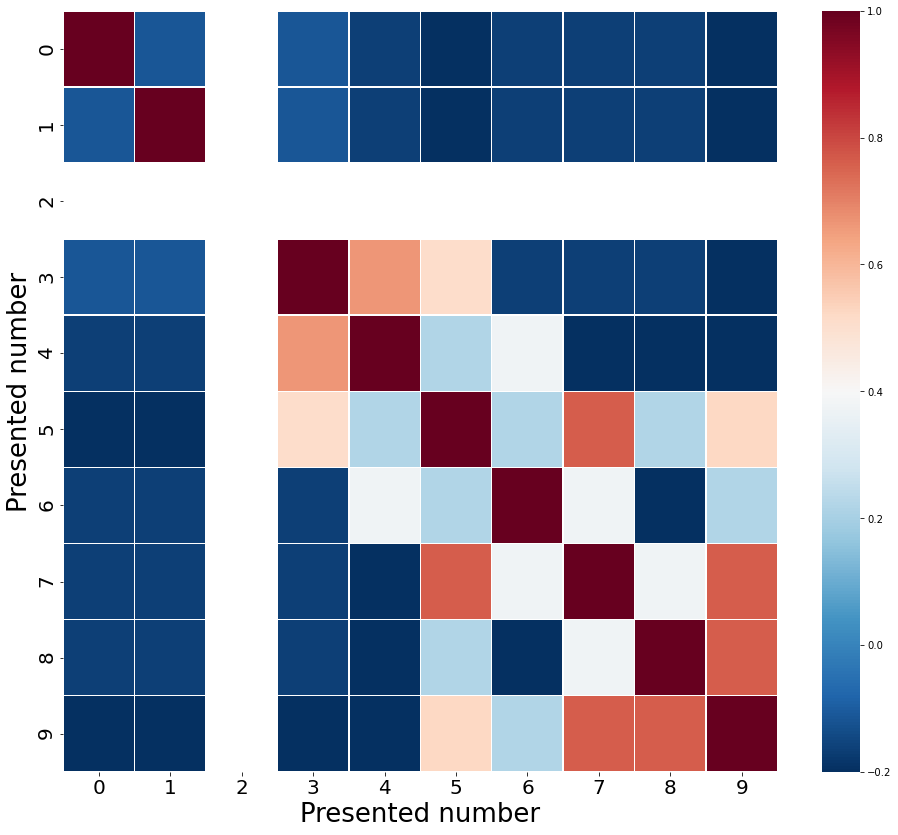

In [13]:
exp_dir = '/home/silvester/programming/rl-single-agent-numbers/remote/counting-agents/data/static_1/classify_WriteCoord_spatial_1_to_9_22-09-2021_18-33-16'
#exp_dir = '/home/silvester/programming/rl-single-agent-numbers/remote/counting-agents/data/temporal_1/classify_WriteCoord_temporal_1_to_9_22-09-2021_18-33-16'
#exp_dir = '/home/silvester/programming/rl-single-agent-numbers/remote/counting-agents/data/temporal_abacus_1D_1/classify_Abacus_temporal_1_to_9_22-09-2021_18-33-16'
#exp_dir = '/home/silvester/programming/rl-single-agent-numbers/remote/counting-agents/data/temporal_abacus_2D_1/classify_Abacus_temporal_1_to_9_22-09-2021_18-33-16'


# Load external representations
file_dir = exp_dir + '/ext_representations/external_representations.pkl'
with open(file_dir, 'rb') as f:
    ext_repr = pickle.load(f)

# Plot and save token positions of external representations if task == Abacus
#file_path = exp_dir + '/token_positions.svg'
#plot_and_save_token_positions_of_reprs(ext_repr, file_path=file_path)

# Plot and save correlations between the external representations
file_path = exp_dir + '/ext_repr_correlation.svg'
plot_and_save_external_repr_correlation(ext_repr, task_description='', file_path=file_path)





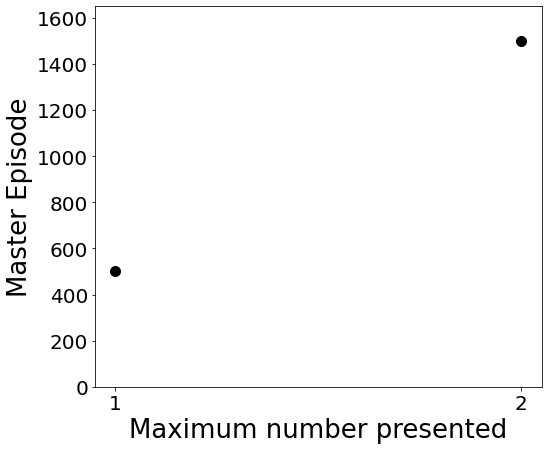

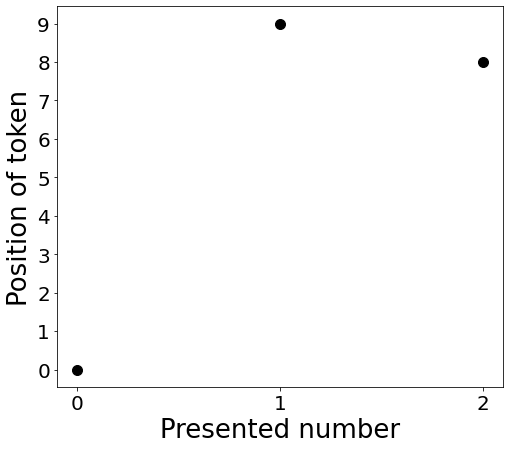

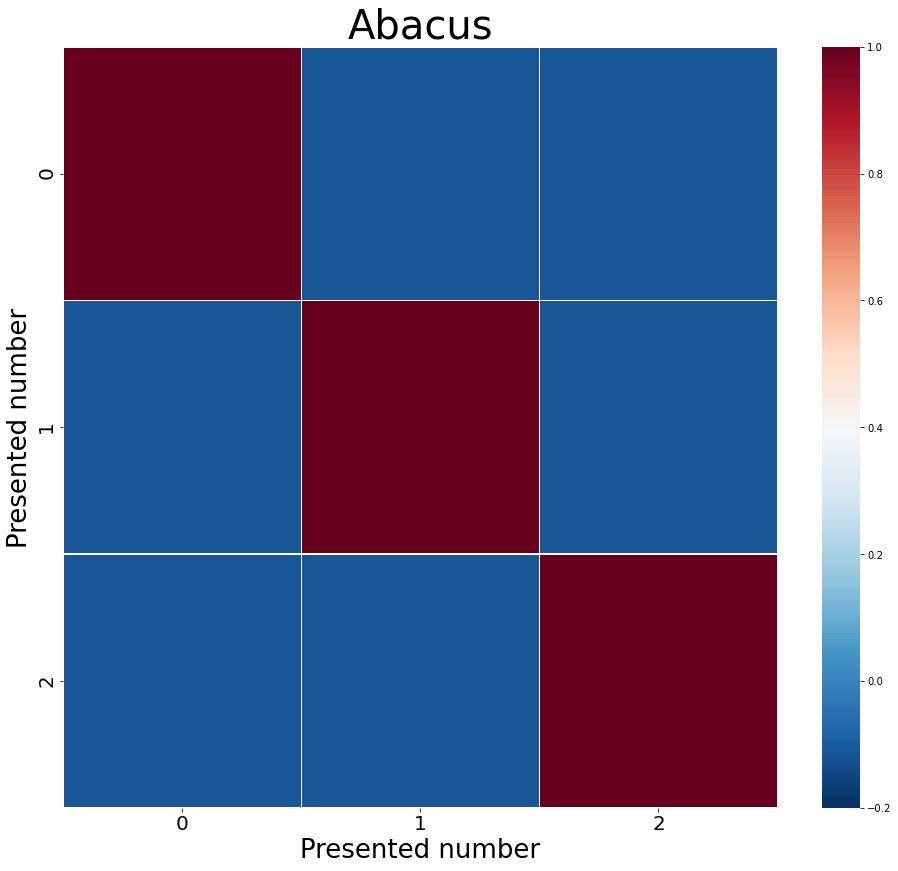

In [155]:
# Get example representations from right directory
#exp_dir = data_dir + 'classify_Abacus_temporal_2_to_9_20-09-2021_16-04-37'
#exp_dir = data_dir + 'classify_WriteCoord_temporal_2_to_9_21-09-2021_14-08-22'
#exp_dir = data_dir + 'classify_WriteCoord_temporal_1_to_2_21-09-2021_19-09-56'
#exp_dir = data_dir + 'static_1/classify_Abacus_temporal_1_to_2_22-09-2021_16-44-32'
#exp_dir = data_dir + 'static_1/classify_Abacus_temporal_1_to_2_22-09-2021_16-44-32'

exp_dir = data_dir + 'static_1/classify_WriteCoord_spatial_1_to_9_22-09-2021_18-33-16'

# Load master episodes
file_dir = exp_dir + '/master_episodes.pkl'
with open(file_dir, 'rb') as f:
    master_episodes = pickle.load(f)
    
# Plot and save master episodes
file_path = exp_dir + '/master_episodes.svg'
plot_and_save_master_episodes(master_episodes, file_path)


# Load external representations
file_dir = exp_dir + '/ext_representations/external_representations.pkl'
with open(file_dir, 'rb') as f:
    ext_repr = pickle.load(f)

# Plot and save token positions of external representations if task == Abacus
file_path = exp_dir + '/token_positions.svg'
plot_and_save_token_positions_of_reprs(ext_repr, file_path=file_path)

# Plot and save correlations between the external representations
file_path = exp_dir + '/ext_repr_correlation.svg'
plot_and_save_external_repr_correlation(ext_repr, task_description='Abacus', file_path=file_path)

In [ ]:
def get_correlation_matrix(df_test,within_class,within_class_instance,check_class,layer,plot=False,ax=None ):
    first,second=df_test[check_class].unique(),df_test[check_class].unique()
    var_len = len(first)
    range_var_len = range(var_len)

    combined = [(f,s) for f in range_var_len for s in range_var_len]

    corr_matrix = np.empty([var_len,var_len ])
    for (i,j) in combined: 
        i_class_instance=df_test[check_class].unique()[i]
        j_class_instance=df_test[check_class].unique()[j]
        try:
            vec1 = get_node_activity_vector(df_test, within_class, within_class_instance, check_class, i_class_instance, layer).values[0]
        except IndexError:
            print(within_class, within_class_instance, check_class, i_class_instance, layer)
        vec2 = get_node_activity_vector(df_test, within_class, within_class_instance, check_class, j_class_instance, layer).values[0]
        #corry = df_test[(df_test[within_class]==within_class_instance) & (df_test[check_class]==i_class_instance) & (df_test['layer']==layer)].node_activities.corr(df_test[(df_test[within_class]==within_class_instance) & (df_test[check_class]==j_class_instance) & (df_test['layer']==layer)].node_activities, method='pearson')
        corry = np.corrcoef(vec1, vec2)[0, 1]
        corr_matrix[i,j] = corry
    
        
    title=task_description 
    tick_labels = df_test[check_class].unique()
    if(ax is None):
        ax = plt.axes()
    sb.heatmap(corr_matrix, 
                xticklabels=tick_labels,
                yticklabels=tick_labels,
                cmap='RdBu_r',
                linewidth=0.5,
                  ax=ax,
              vmin=-0.2,
              vmax=1.0,
              annot=False)

    ax.set_title(title)
    
    
    return corr_matrix

Working with max  3  objects


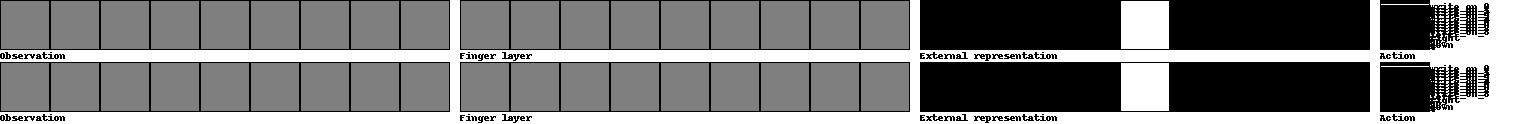

In [3]:
##############
## Static Environment Image
###################

obs_ext_shape = (4,1)
agent_params = {
    'single_or_multi_agent': 'multi',
    'task': 'classify',
    'external_repr_tool': 'WriteCoord',
    'observation': 'spatial',
    'max_objects': 3,
    'obs_shape': obs_ext_shape,
    'ext_shape': obs_ext_shape,
    'max_episode_length': 8,
    'curriculum_learning': False
}



if(agent_params['single_or_multi_agent'] == 'multi'):
    env = MultiAgentEnvironment(agent_params)
    env.agents[0].check_reward = False
if(agent_params['single_or_multi_agent'] == 'single'):
    env = SingleRLAgent(agent_params)
    env.check_reward = False
    
#env.max_episode_length = 7
#env.reset()
display(env.render(), display_id='model_demo')
env.step(['down', 'write_on_2'])
update_display(env.render(), display_id='model_demo')

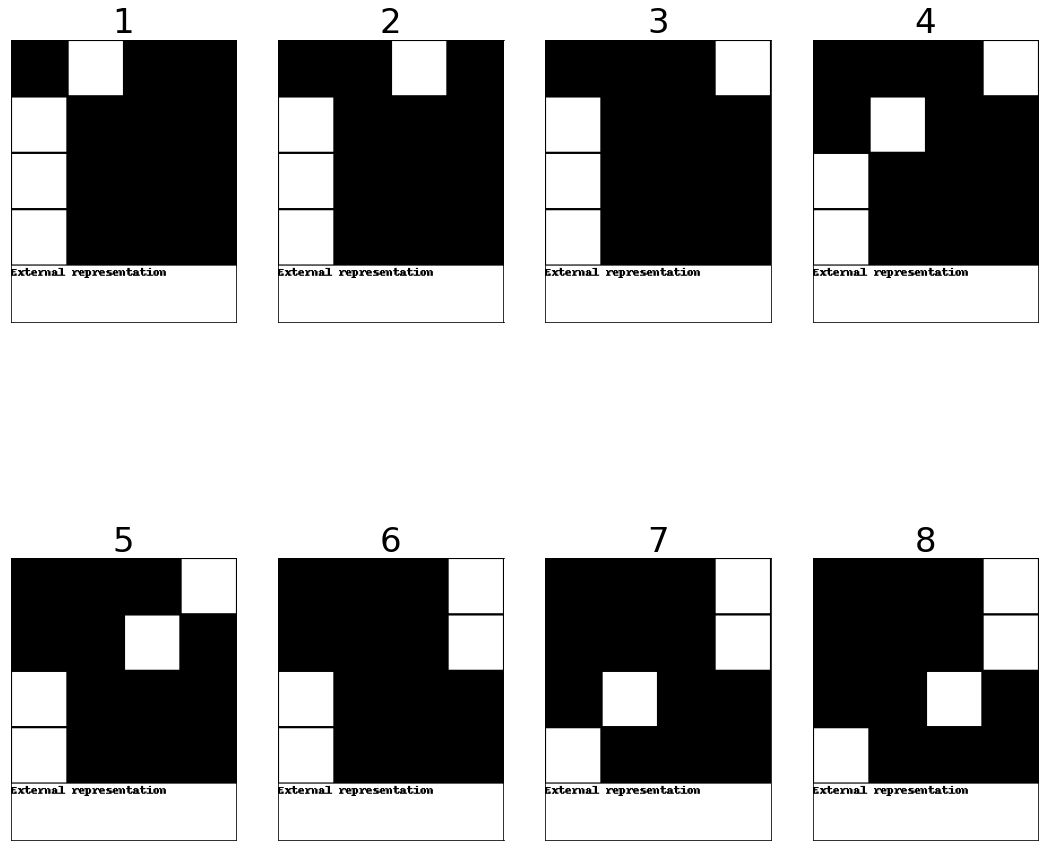

In [55]:
##############
## Plot grid of hand-crafted external representations
##########################################


##############
## Dynamic Environment Demo with Sequence of Actions
###################


agent_params = {
    'single_or_multi_agent': 'single',
    'task': 'classify',
    'external_repr_tool': 'Abacus',
    'observation': 'temporal',
    'max_objects': 2,
    'obs_dim': 4,
    'obs_shape': (4,4),
    'ext_shape': (4,4),
    'IsSubmitButton': False,
    'max_episode_length': 8,
    'curriculum_learning': False
}



if(agent_params['single_or_multi_agent'] == 'multi'):
    env = MultiAgentEnvironment(agent_params)
    env.agents[0].check_reward = False
if(agent_params['single_or_multi_agent'] == 'single'):
    env = SingleRLAgent(agent_params)
    env.check_reward = False
#env.max_episode_length = 7
env.reset()
#display(env.render(), display_id='model_demo')
grid_width = 4
grid_height = 2
fig, axs = plt.subplots(grid_height, grid_width,figsize=(15,15))
fig.tight_layout()
j_repr = -1
    
for i in range(agent_params['max_episode_length']+2):
    #env.step(['right', 'mod_point'])
    moved_token = True
    if(i==3 or i==7):
        env.step(env.all_actions_dict_inv['down'])
        moved_token = False
    else:
        env.step(env.all_actions_dict_inv['move_token_right'])
        j_repr += 1
    #update_display(env.render(), display_id='model_demo')
    #time.sleep(3)
    if(moved_token):
        img = env.render()
        ax = axs[j_repr//grid_width, j_repr%grid_width]
        ax.imshow(env.ext_repr_img)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(str(j_repr+1), fontsize=34)
    

plt.subplots_adjust(hspace=0)
    
    

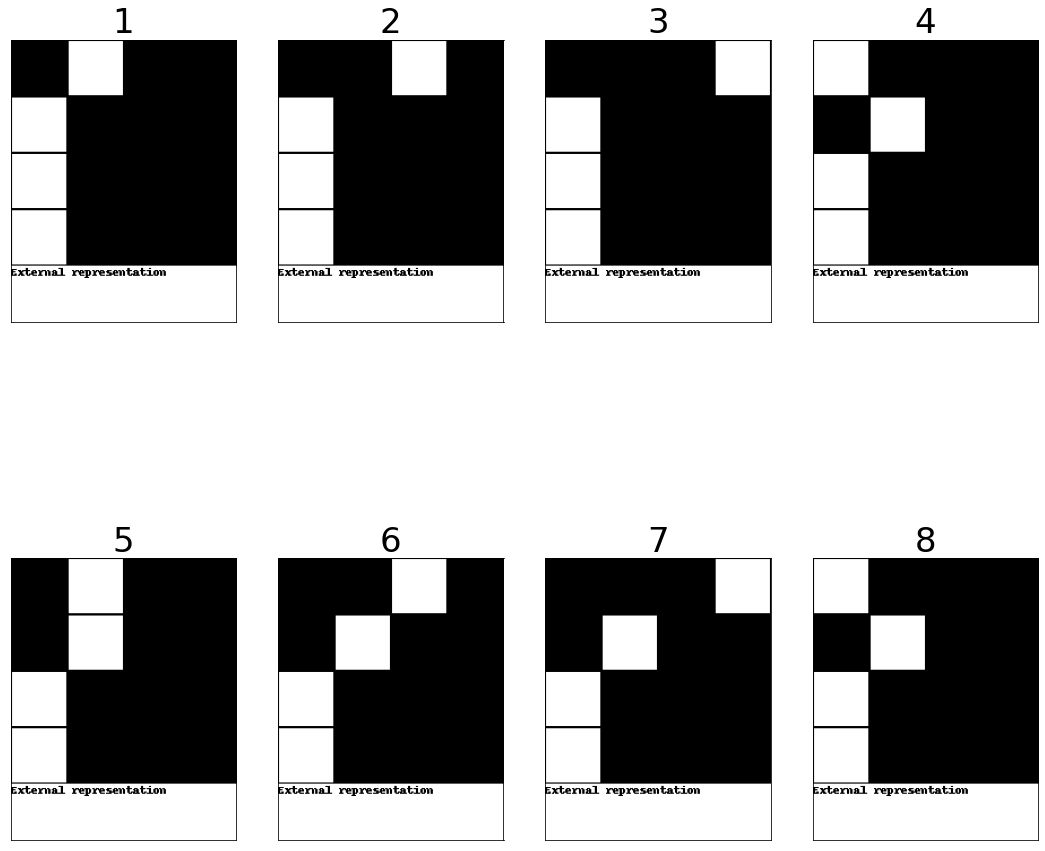

In [62]:
env.reset()
#display(env.render(), display_id='model_demo')
grid_width = 4
grid_height = 2
fig, axs = plt.subplots(grid_height, grid_width,figsize=(15,15))
fig.tight_layout()

mv_str = 'move_token_right'
action_list = [mv_str, mv_str, mv_str, mv_str, 'down', mv_str, 'up', mv_str, mv_str, mv_str, mv_str]
j_repr = -1
    
for i in range(agent_params['max_episode_length']+3):
    #env.step(['right', 'mod_point'])
    env.step(env.all_actions_dict_inv[action_list[i]])
    #update_display(env.render(), display_id='model_demo')
    #time.sleep(3)
    if(action_list[i]==mv_str and i!=3):
        j_repr += 1
        img = env.render()
        ax = axs[j_repr//grid_width, j_repr%grid_width]
        ax.imshow(env.ext_repr_img)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(str(j_repr+1), fontsize=34)
    

plt.subplots_adjust(hspace=0)

In [24]:
env.step(['move_token_right', 'move_token_right'])
update_display(env.render(), display_id='model_demo')

In [18]:
%run SingleAgent.py
%run MultiAgentEnvironment.py
%run utils.py

KeyError: 'Agent_Setup'

In [3]:
agent_params = {
    'max_objects': 4,
    'obs_dim': 4,
}

agent = SingleRLAgent(agent_params)

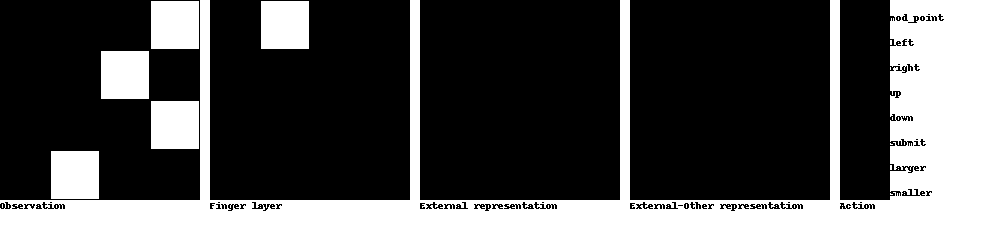

In [4]:
agent.render()

In [26]:
def demonstrate_model(model, env, collect=False, eval=True, n_objects=None):
    total_rewards = []
    summed_rewards = 0

    states = env.reset(n_objects)
    states = torch.stack([torch.unsqueeze(ptu.from_numpy(state), dim=0) for state in states]).transpose(0,1)
    t_sofar = 0
    done = False

    
    actions_during_episode = []
    img_list = []
    img_list.append(env.render(display_id="model_demo"))
    time.sleep(2)

    while not done:
        t_sofar += 1
        actions_tensors = model(states)
        action_arr = [ptu.to_numpy(actions_tensor) for actions_tensor in actions_tensors]
        actions = [np.argmax(action_arr[0], axis=1)[0], np.argmax(action_arr[1], axis=1)[0]]
        actions_during_episode.append(actions)
        next_states, reward, done, _ = env.step(actions)

        # Convert numpy objects to tensors for saving in memory
        reward = torch.tensor([ptu.from_numpy(np.array(reward))])
        actions = torch.stack([torch.unsqueeze(ptu.from_numpy(np.array(action)),dim=0) for action in actions])
        if next_states is not None:
            next_states = torch.stack([torch.unsqueeze(ptu.from_numpy(next_state), dim=0) for next_state in next_states]).transpose(0,1)

        # Move to the next state
        states = next_states


        if done:
            reward = reward.cpu().numpy().item()
            summed_rewards += reward
            total_rewards.append(reward)

        #if(eval and i_episode==0):
        #    print("act ", t_sofar, ": ", actions)
        print(actions)
        img_list.append(env.render(display_id="model_demo"))
        time.sleep(2)
    return img_list



In [ ]:
# Define Environment (2-Agents)

agent_params = {
    'max_objects': 2,
    'obs_dim': 4,
    'max_episode_length': 1,
}

# agent_params = {
#     'max_objects': 3,
#     'obs_dim': 4,
#     'max_episode_length': 3,
# }

agent_params = {
    'max_objects': 4,
    'obs_dim': 4,
    'max_episode_length': 5,
}

agent_params = {
    'max_objects': 9,
    'obs_dim': 4,
    'max_episode_length': 7,
}

agent_params = {
    'max_objects': 8,
    'obs_dim': 4,
    'max_episode_length': 8,
    'observation': 'spatial'
}




obs_ext_shape = (9,1)

agent_params = {
    'max_objects': 8,
    'obs_shape': obs_ext_shape,
    'ext_shape': obs_ext_shape,
    'max_episode_length': 8,
    'observation': 'spatial',
    'single_or_multi_agent': 'multi',
    'external_repr_tool': 'WriteCoord'
}

Working with max  2  objects


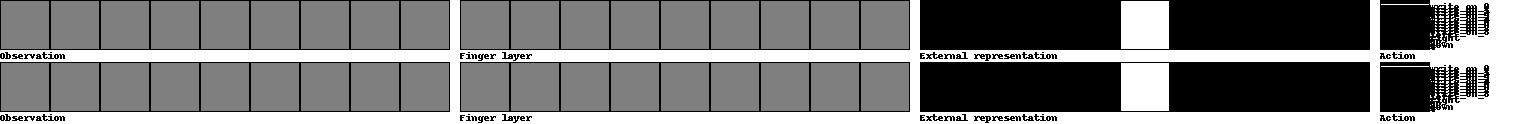

tensor([[4.],
        [4.]])
tensor([[1.],
        [1.]])
tensor([[1.],
        [1.]])


In [30]:


model_dir = data_dir + 'classify_WriteCoord_spatial_2_to_3_16-08-2021_15-37-38/'
params_file = model_dir + 'params.pickle'
model_file = model_dir + 'best_model.pt'

with open(params_file, 'rb') as f:
    agent_params = pickle.load(f)['agent_params']

agent_params['max_objects'] = 2


env = MultiAgentEnvironment(agent_params)
#env.max_episode_length = 7
env.reset()
ext_shape = env.agents[0].ext_shape
dimmy = 1 if ext_shape[1] == 1 else 2
    
display(env.render(), display_id='model_demo')

n_channels, screen_height, screen_width  = env.states[0].shape  # Assumes that all agents have same state-dim as agent[0]
n_actions = env.agents[0].action_dim
#model = N_Concat_CNNs(n_channels, n_actions, shared_policy=False)
model = N_Concat_CNNs(n_channels, n_actions, shared_policy=True, example_input = env.states, dim=dimmy)
# Successful 2
#model.load_state_dict(torch.load('/home/silvester/programming/rl-communicating-numbers/counting-agents/src/../data/TODO_30-04-2021_16-16-33/model.pt'))
# Successful 3
#model.load_state_dict(torch.load('/home/silvester/programming/rl-communicating-numbers/counting-agents/src/../data/TODO_03-05-2021_11-34-15/model.pt'))
# Successful 4
#model.load_state_dict(torch.load('/home/silvester/programming/rl-communicating-numbers/counting-agents/src/../data/TODO_03-05-2021_13-03-38/model.pt'))
# almost - Successful 5
#model.load_state_dict(torch.load('/home/silvester/programming/rl-communicating-numbers/counting-agents/src/../data/TODO_03-05-2021_14-22-02/model.pt'))
# 60 % for 9
#model.load_state_dict(torch.load('/home/silvester/programming/rl-communicating-numbers/counting-agents/src/../data/TODO_04-05-2021_13-36-48/model.pt'))
# 82 % for 9
#model.load_state_dict(torch.load('/home/silvester/programming/rl-communicating-numbers/counting-agents/src/../data/TODO_04-05-2021_22-08-07/model.pt'))
# Classify to 5 82 %
#model.load_state_dict(torch.load('/home/silvester/programming/rl-communicating-numbers/counting-agents/src/../data/TODO_05-05-2021_18-37-48/model.pt'))
# Classify to 5 95 %
#model.load_state_dict(torch.load('/home/silvester/programming/rl-communicating-numbers/counting-agents/src/../data/TODO_07-05-2021_11-03-33/model.pt'))
# even more: TODO_07-05-2021_11-32-52
# Reproduce up til 8 objects: 
#model.load_state_dict(torch.load('/home/silvester/programming/rl-communicating-numbers/counting-agents/src/../data/TODO_11-05-2021_11-30-16/model.pt'))
model.load_state_dict(torch.load(model_file), strict=False)




img_list = demonstrate_model(model, env, n_objects=[2,3])

In [38]:
a = np.zeros((4, 4))
a.ravel()[np.random.choice(4*4, 8, replace=False)] = 1
print(a)
print(a.sum())

[[1. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 1.]]
8.0


In [135]:
test_dict = {
    0: '0',
    1: '1',
    2: '2',
}
len(test_dict)

3

In [56]:
interact(img_slider,t=(0, len(img_list)-1, 1));

interactive(children=(IntSlider(value=2, description='t', max=4), Output()), _dom_classes=('widget-interact',)…

In [70]:
imageio.mimsave('../results/animations/comparison_up_3_2_vs_3.gif', img_list, duration=2)

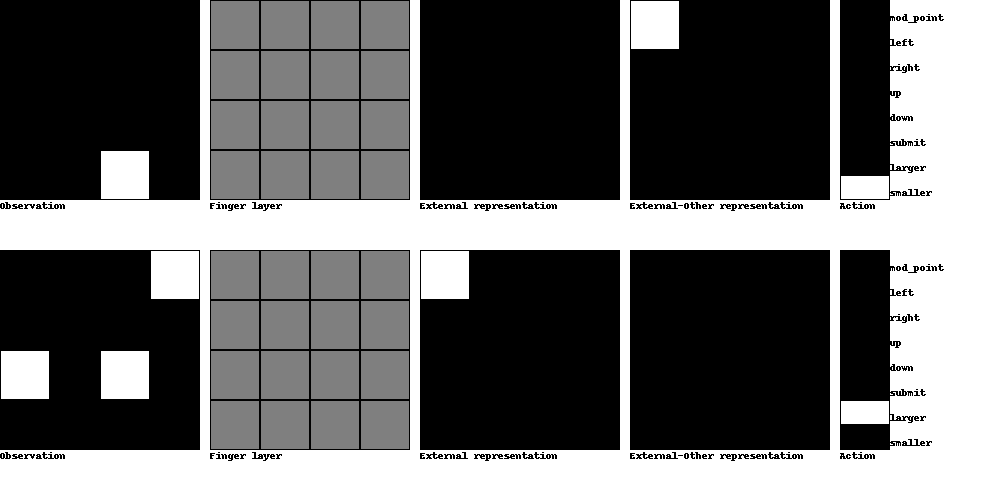

In [43]:
def img_slider(t):
    display(img_list[t], display_id="slider_display")
    
img_slider(0)


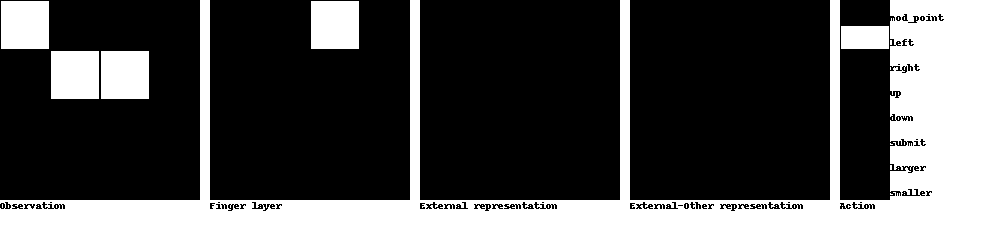

In [5]:
action = 'left'
agent.step(action)
agent.render()

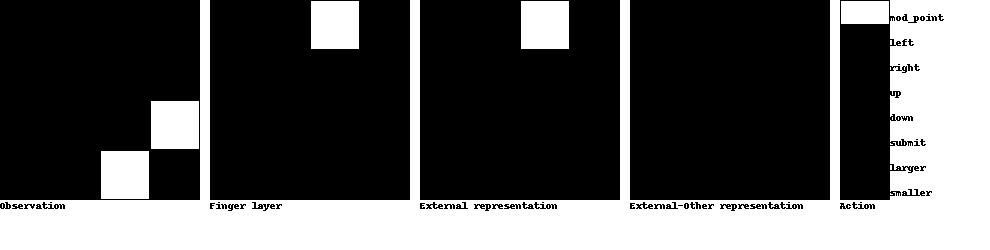

In [6]:
### Create a gif with sample actions
import imageio
import time

agent_params = {
    'max_objects': 4,
    'obs_dim': 4,
}

agent = SingleRLAgent(agent_params)
display(agent.render(), display_id="demo")

images = []
images.append(agent.render())

n_steps = 5
for i in range(n_steps):
    action = n_steps-i-1 #random.randint(0, agent.action_dim-1)
    agent.step(action)
    agent.render(display_id="demo")
    time.sleep(1)
    #images.append(agent.render())
#imageio.mimsave('env_demo_2.gif', images, fps=0.5)

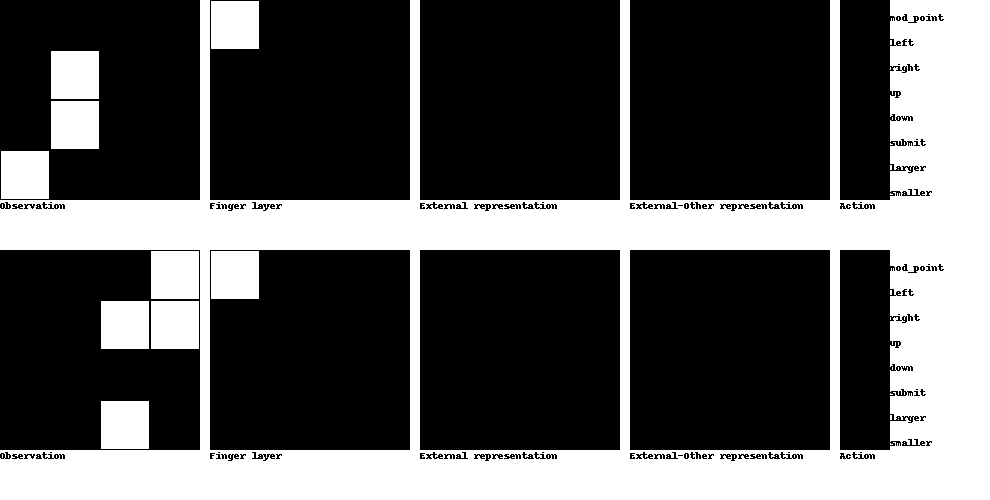

In [3]:
### Create a gif with sample actions
import imageio
import time

agent_params = {
    'max_objects': 4,
    'obs_dim': 4,
}

agent = MultiAgentEnvironment(agent_params)
agent.render()

# images = []
# images.append(agent.render())

# n_steps = 5
# for i in range(n_steps):
#     action = n_steps-i-1 #random.randint(0, agent.action_dim-1)
#     agent.step(action)
#     plt.show(agent.render(display_id="demo"))
#     time.sleep(1)
#     images.append(agent.render())

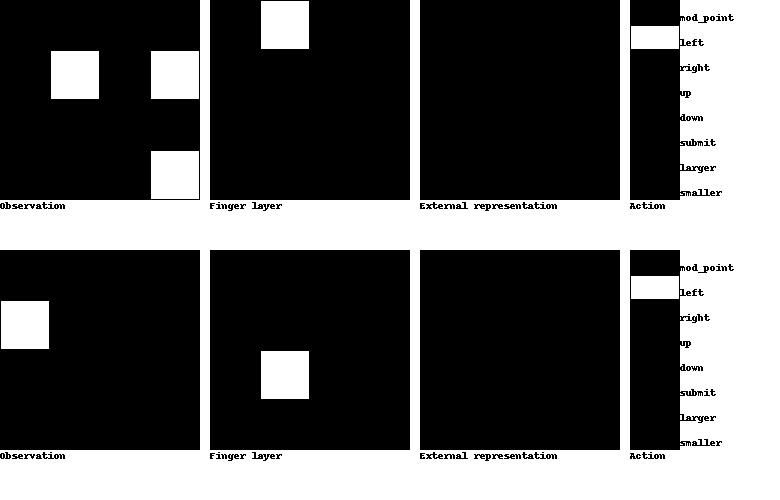

Reward:  0
Done:  True


In [11]:
_, reward, done, _ = agent.step(['left', 'left'])
display(agent.render(), display_id='game')
print("Reward: ", reward)
print("Done: ", done)

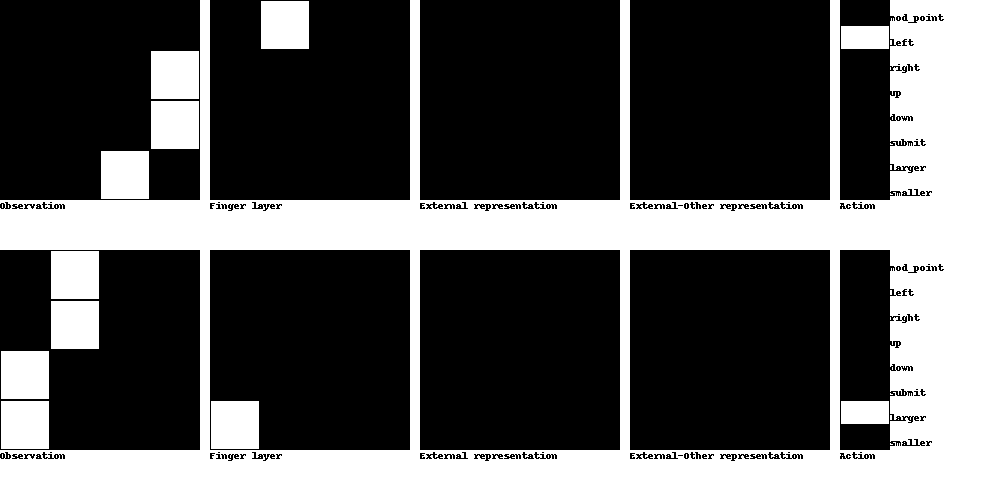

Reward:  0
Done:  False
Reward:  0
Done:  False
Reward:  1
Done:  True


In [9]:
action_list = [['left', 'left'], ['smaller', 'left'], ['left', 'larger']]
display(agent.render(), display_id='multi_game')

for action in action_list:
    _, reward, done, _ = agent.step(action)
    img = agent.render(display_id="multi_game")
    time.sleep(1)
    print("Reward: ", reward)
    print("Done: ", done)

In [14]:
action = ['mod_point', 'left']
_, reward, done, _ = agent.step(action)
img = agent.render(display_id="multi_game")

In [48]:
n_range = np.arange(1, 4+1)
print("n_range: ", n_range)

n_objects = np.random.choice(n_range, 2, replace=False)
print(n_objects)

n_range:  [1 2 3]
[1 2]


In [26]:
env.max_episode_length

3

In [4]:
def funcy():
    print("here we go")

def funcy2():
    print("here we go 2")
    
class ExperimentSetup():
    def __init__(self, func_i):
        
        self.vari = 0
        self.incry()
        self.reward_funcy = func_i

    def reward_function(self):
        self.reward_funcy()
    def env_update(self):
        pass
    def update_state(self):
        state = np.stack([self.obs, self.fingerlayer.fingerlayer, self.ext_repr.externalrepresentation])
        return state
    
    def incry(self):
        self.vari += 1

In [3]:
def iteraty():
    l = 2
    for i in range(10000000):
        l += 1

In [4]:
import cProfile
cProfile.run('iteraty()')

         4 function calls in 0.392 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.392    0.392    0.392    0.392 <ipython-input-3-ebc7f820c210>:1(iteraty)
        1    0.000    0.000    0.392    0.392 <string>:1(<module>)
        1    0.000    0.000    0.392    0.392 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [42]:
for n in range(6):
    print(random.randint(2,3))

3
2
2
2
2
2


In [18]:
def calc_event_timesteps(n_objects):
    big_timestep_range_from_n = 5
    small_timestep_range = [1,2]
    big_timestep_range = [2,3]
    timestep_range = small_timestep_range

    event_timesteps = []
    t_n = 0

    for n in range(1,n_objects+1):
        if(n==big_timestep_range_from_n):
            timestep_range = big_timestep_range
        t_n += random.randint(timestep_range[0],timestep_range[1])
        event_timesteps.append(t_n)
        
    return event_timesteps
    
def calc_max_episode_length(n_objects, observation):
    if(observation == 'spatial'):
        return 1*n_objects-1
    elif(observation == 'temporal'):
        #return 1*n_objects+1

        big_timestep_range_from_n = 5
        max_time_length = min(big_timestep_range_from_n - 1, n_objects) * 2
        # + max(0,max_objects-big_timestep_range_from_n)*3
        if (n_objects >= big_timestep_range_from_n):
            max_time_length += (n_objects - big_timestep_range_from_n+1) * 3
        return max_time_length
    
n_objects = 5
event_timesteps = calc_event_timesteps(n_objects)
max_episode_length = calc_max_episode_length(n_objects, observation='temporal')
print("event_timesteps: ", event_timesteps)
print("max_episode_length: ", max_episode_length)


event_timesteps:  [2, 3, 5, 7, 9]
max_episode_length:  11


In [20]:
ext_repr_imgs = {i: [] for i in range(1, 5)}
print(ext_repr_imgs)
ext_repr_imgs[1].append(5)
print(ext_repr_imgs)

{1: [], 2: [], 3: [], 4: []}
{1: [5], 2: [], 3: [], 4: []}
